In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch
import scipy.linalg as linalg
dimension = 8
regularization = 1
power = -1
dims = []
Ws = None
D = None
def solve(features_list):      
        for f in features_list:        
          dims.append(f.size(1))          
        S, S_D = computeCovMatrix(dims,features_list)
        Weight_matrix=findMatrixAndEig(S, S_D)
        return Weight_matrix
def computeCovMatrix(dims,features_list):
        
        dims = torch.Tensor(dims)       
        dim = torch.Tensor(dims).sum().int().item()      
        S = torch.zeros((dim, dim))
        S_D = torch.zeros((dim, dim))
        indices = dims.cumsum(0)

        indices = torch.cat([torch.Tensor([0]), indices]).int()
        # print(indices)       
        n_views = len(features_list)      
        for i in range(n_views):       
            for j in range(i):
                # print(i,j)
                S_ij = features_list[i].t() @ features_list[j]                      
                S[indices[i]:indices[i+1], indices[j]:indices[j+1]] = S_ij                                        
            S_ii = features_list[i].t() @ features_list[i]                        
            S_D[indices[i]:indices[i+1], indices[i]:indices[i+1]] = S_ii
        S = S + S.t() + S_D
       
        return S, S_D

def findMatrixAndEig( S, S_D):
        # print(S.size())
        # print(S_D.size())
        # REGULARIZE
        I_g = regularization * torch.eye(len(S))
        
        S_D = S_D + I_g
        # FIND EIGENVECTORS and GET THE INDICES OF THE D LARGEST EIGENVALUES
        eigenValues, eigenVectors = linalg.eig(S.numpy(), S_D.numpy())
        eigenValues, eigenVectors = torch.from_numpy(eigenValues.real), torch.from_numpy(eigenVectors.real)
        
        idx=eigenValues.argsort(descending=True)[:8].tolist()
        
        # BUILD W AND D
        D = torch.diag(eigenValues[torch.tensor(idx)] ** power)
        Ws = eigenVectors[:, torch.tensor(idx)].split(dims)
        return Ws,D


In [ ]:
import pandas as pd
import torch
import math

df=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df=df[:5600]
df=df.drop('Unnamed: 0',1)
df.drop(df.iloc[:, 768:], inplace = True,axis=1) 
df1=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df1=df1[:5600]
df1=df1.drop('Unnamed: 0',1)
df1.drop(df1.iloc[:, 0:768], inplace = True,axis=1) 
df1=df1.drop('class',1)
X=list(df.values)#text
Y=list(df1.values)#image
x=torch.tensor(X)
y=torch.tensor(Y)
Wn,Dn=solve([y,x])


In [ ]:
import torch
import scipy.linalg as linalg
dimension = 8
regularization = 1
power = -1
dims = []
Ws = None
D = None
def solve_meme(features_list):      
        for f in features_list:        
          dims.append(f.size(1))          
        S, S_D = computeCovMatrix(dims,features_list)
        Weight_matrix=findMatrixAndEig(S, S_D)
        return Weight_matrix
def computeCovMatrix(dims,features_list):
        
        dims = torch.Tensor(dims)       
        dim = torch.Tensor(dims).sum().int().item()      
        S = torch.zeros((dim, dim))
        S_D = torch.zeros((dim, dim))
        indices = dims.cumsum(0)

        indices = torch.cat([torch.Tensor([0]), indices]).int()
        # print(indices)       
        n_views = len(features_list)      
        for i in range(n_views):       
            for j in range(i):
                # print(i,j)
                S_ij = features_list[i].t() @ features_list[j]                      
                S[indices[i]:indices[i+1], indices[j]:indices[j+1]] = S_ij                                        
            S_ii = features_list[i].t() @ features_list[i]                        
            S_D[indices[i]:indices[i+1], indices[i]:indices[i+1]] = S_ii
        S = S + S.t() + S_D
       
        return S, S_D

def findMatrixAndEig( S, S_D):
        # print(S.size())
        # print(S_D.size())
        # REGULARIZE
        I_g = regularization * torch.eye(len(S))
        
        S_D = S_D + I_g
        # FIND EIGENVECTORS and GET THE INDICES OF THE D LARGEST EIGENVALUES
        eigenValues, eigenVectors = linalg.eig(S.numpy(), S_D.numpy())
        eigenValues, eigenVectors = torch.from_numpy(eigenValues.real), torch.from_numpy(eigenVectors.real)
        
        idx=eigenValues.argsort()[:8].tolist()
        
        # BUILD W AND D
        D = torch.diag(eigenValues[torch.tensor(idx)] ** power)
        Ws = eigenVectors[:, torch.tensor(idx)].split(dims)
        return Ws,D


In [ ]:
import pandas as pd
import torch
df3=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df3=df3[7000:12600]
df3=df3.drop('Unnamed: 0',1)
df3.drop(df3.iloc[:, 768:], inplace = True,axis=1) 
df4=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df4=df4[7000:12600]
df4=df4.drop('Unnamed: 0',1)
df4.drop(df4.iloc[:, 0:768], inplace = True,axis=1) 
df4=df4.drop('class',1)
A=list(df3.values)#text
B=list(df4.values)#image
a=torch.tensor(A)
b=torch.tensor(B)
Wm,Dm=solve_meme([b,a])


In [ ]:
w_image_nonmeme=Wn[0]
w_text_nonmeme=Wn[1]
print(w_text_nonmeme)
print(w_image_nonmeme.size())
w_image_meme=Wm[0]
w_text_meme=Wm[1]
print(w_text_meme.size())
print(w_image_meme)

tensor([[-0.0047,  0.0033,  0.0250,  ..., -0.0064, -0.0068,  0.0213],
        [-0.0229,  0.0133,  0.0137,  ..., -0.0063, -0.0089, -0.0205],
        [-0.0099, -0.0024,  0.0114,  ..., -0.0047,  0.0081, -0.0076],
        ...,
        [ 0.0150,  0.0217,  0.0044,  ..., -0.0074,  0.0178,  0.0026],
        [-0.0496, -0.0086,  0.0067,  ..., -0.0317,  0.0154, -0.0258],
        [-0.0386,  0.0163,  0.0161,  ...,  0.0204, -0.0042,  0.0039]])
torch.Size([512, 8])
torch.Size([768, 8])
tensor([[-0.0043, -0.0052,  0.0281,  ..., -0.0408,  0.0006,  0.0182],
        [ 0.0012, -0.0022,  0.0448,  ..., -0.0120,  0.0082,  0.0066],
        [-0.0002,  0.0028,  0.0606,  ...,  0.0413, -0.0594, -0.0045],
        ...,
        [ 0.0004, -0.0063, -0.0285,  ...,  0.0208, -0.0102, -0.0195],
        [-0.0024, -0.0032, -0.0081,  ..., -0.0762, -0.0204,  0.0283],
        [ 0.0002,  0.0020,  0.0180,  ...,  0.0809, -0.0259, -0.0023]])


In [ ]:
#multiplication of non memes with weights
import numpy as np
a1=np.array(w_text_nonmeme.tolist())
b1=np.array(X)
c1=a1.T @ b1.T


import numpy as np
p1=np.array(w_image_nonmeme.tolist())
q1=np.array(Y)
r1=p1.T @ q1.T


import numpy as np
a2=np.array(w_text_meme.tolist())
b2=np.array(X)
c2=a2.T @ b2.T




import numpy as np
p2=np.array(w_image_meme.tolist())
q2=np.array(Y)
r2=p2.T @ q2.T

train_non_image=[]
train_non_test=[]
for i in range(len(X)):
  train_non_image.append(list(c1.T[i])+list(c2.T[i]))
  train_non_test.append(list(r1.T[i])+list(r2.T[i]))
  
print(len(train_non_test[i]))

16


In [ ]:
#multiplication of  memes with weights
import numpy as np
a3=np.array(w_text_nonmeme.tolist())
b3=np.array(A)
c3=a3.T @ b3.T


import numpy as np
p3=np.array(w_image_nonmeme.tolist())
q3=np.array(B)
r3=p3.T @ q3.T


import numpy as np
a4=np.array(w_text_meme.tolist())
b4=np.array(A)
c4=a4.T @ b4.T





import numpy as np
p4=np.array(w_image_meme.tolist())
q4=np.array(B)

r4=p4.T @ q4.T



train_image=[]
train_test=[]
for i in range(len(A)):
  train_image.append(list(c3.T[i])+list(c4.T[i]))
  train_test.append(list(r4.T[i])+list(r4.T[i]))
  

In [ ]:
from scipy.spatial.distance import cityblock
def manhattan(image_feature,text_feature):
  dist = cityblock(image_feature,text_feature)
  return dist

In [ ]:
manhattan_distances_nonmemes=[]
manhattan_distances_memes=[]
image_dist_nonmeme=[]
image_dist_meme=[]
text_dist_nonmeme=[]
image_dist_meme=[]
text_dist_meme=[]
for i in range(len(X)):
  a1=manhattan(train_non_image[i],train_non_test[i])
  manhattan_distances_nonmemes.append(a1)

for i in range(len(A)):
  a2=manhattan(train_image[i],train_test[i])
  manhattan_distances_memes.append(a2)


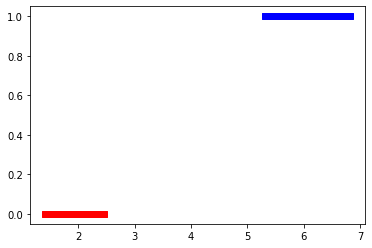

In [ ]:

u1=[0]*5600
u2=[1]*5600
from matplotlib import pyplot as plt
plt.scatter(manhattan_distances_nonmemes,u1,marker=",",color='red')
plt.scatter(manhattan_distances_memes,u2,marker=",",color='blue')
plt.show()

In [ ]:
import pandas as pd
import torch
df5=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df5=df5[5600:7000]
df5=df5.drop('Unnamed: 0',1)
df5.drop(df5.iloc[:, 768:], inplace = True,axis=1) 
df6=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df6=df6[5600:7000]
df6=df6.drop('Unnamed: 0',1)
df6.drop(df6.iloc[:, 0:768], inplace = True,axis=1) 
df6=df6.drop('class',1)
X1=list(df5.values)#text
Y1=list(df6.values)#image
print(len(X1))

1400


In [ ]:
import pandas as pd
import torch
df7=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df7=df7[12600:]
df7=df7.drop('Unnamed: 0',1)
df7.drop(df7.iloc[:, 768:], inplace = True,axis=1) 
df8=pd.read_csv('/content/gdrive/My Drive/shuffled_features.csv')
df8=df8[12600:]
df8=df8.drop('Unnamed: 0',1)
df8.drop(df8.iloc[:, 0:768], inplace = True,axis=1) 
df8=df8.drop('class',1)
A1=list(df7.values)#text
B1=list(df8.values)#image

In [ ]:
#testing
#multiplication of non memes with weights
import numpy as np
a5=np.array(w_text_nonmeme.tolist())
b5=np.array(X1)
c5=a5.T @ b5.T



import numpy as np
p5=np.array(w_image_nonmeme.tolist())
q5=np.array(Y1)
r5=p5.T @ q5.T

import numpy as np
a6=np.array(w_text_meme.tolist())
b6=np.array(X1)

c6=a6.T @ b6.T




import numpy as np
p6=np.array(w_image_meme.tolist())
q6=np.array(Y1)

r6=p6.T @ q6.T



testing_non_image=[]
test_non_image=[]
test_non_test=[]
for i in range(len(X1)):
  test_non_image.append(list(c5.T[i])+list(c6.T[i]))
  test_non_test.append(list(r5.T[i])+list(r6.T[i]))


  

In [ ]:
#multiplication of  memes with weights
import numpy as np
a7=np.array(w_text_nonmeme.tolist())
b7=np.array(A1)


c7=a7.T @ b7.T


import numpy as np
p7=np.array(w_image_nonmeme.tolist())
q7=np.array(B1)


r7=p7.T @ q7.T


import numpy as np
a8=np.array(w_text_meme.tolist())
b8=np.array(A1)


c8=a8.T @ b8.T




import numpy as np
p8=np.array(w_image_meme.tolist())
q8=np.array(B1)

r8=p8.T @ q8.T




test_image=[]
test_test=[]
for i in range(len(A1)):
  test_image.append(list(c7.T[i])+list(c8.T[i]))
  test_test.append(list(r8.T[i])+list(r8.T[i]))
print(len(test_image)) 

1377


In [ ]:
from scipy.spatial.distance import cityblock
def manhattan(image_feature,text_feature):
  dist = cityblock(image_feature,text_feature)
  return dist

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
def cosinsim(image_feature,text_feature):
  cosin_sim=cosine_similarity(image_feature.reshape(),text_feature)
  return cosin_sim

In [ ]:

image_dist_nonmeme=[]
image_dist_meme=[]
text_dist_nonmeme=[]
image_dist_meme=[]
text_dist_meme=[]
manhattan_distances_memes=[]
manhattan_distances_nonmemes=[]
manhattan_distances_memes2=[]
manhattan_distances_nonmemes2=[]

for i in range(len(X1)):
  a1=manhattan(test_non_image[i],test_non_test[i])
  b1=cosinsim(test_non_image[i],test_non_test[i])
  manhattan_distances_nonmemes.append(a1)
  manhattan_distances_nonmemes2.append(b1)

for i in range(len(A1)):
  a2=manhattan(test_image[i],test_test[i])
  b2=cosinsim(test_image[i],test_test[i])
  manhattan_distances_memes.append(a2)
  manhattan_distances_memes2.append(b2)


ValueError: ignored

0
1400


ValueError: ignored

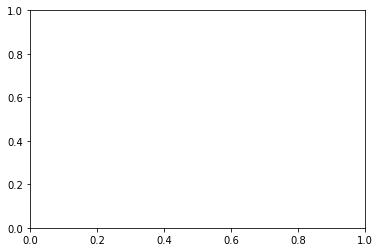

In [ ]:

u1=[0]*len(X1)
u2=[1]*len(A1)
print(len(manhattan_distances_nonmemes))
print(len(u1))
from matplotlib import pyplot as plt
plt.scatter(manhattan_distances_nonmemes,u1,marker=",",color='red')
plt.scatter(manhattan_distances_memes,u2,marker=",",color='blue')

plt.show()

0
1400


ValueError: ignored

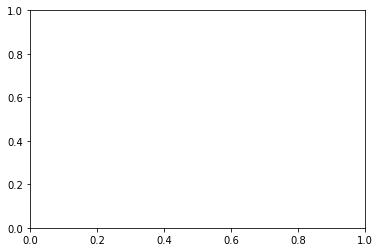

In [ ]:

u1=[0]*len(X1)
u2=[1]*len(A1)
print(len(manhattan_distances_nonmemes))
print(len(u1))
from matplotlib import pyplot as plt
plt.scatter(manhattan_distances_nonmemes2,u1,marker=",",color='red')
plt.scatter(manhattan_distances_memes2,u2,marker=",",color='blue')

plt.show()

In [ ]:
train_nonmeme=[]
for i in range(len(X)):
    train_nonmeme.append(train_non_image[i]+train_non_test[i]+[1])
print(len(train_nonmeme[0]))
concat_nonmeme=pd.DataFrame(train_nonmeme)
print(concat_nonmeme)
concat_nonmeme.to_csv('/content/gdrive/My Drive/final_nonmeme_32_features.csv')

33
            0         1         2         3   ...        29        30        31  32
0     3.382202  0.164802 -0.023359 -0.021057  ...  0.125733  0.032244  0.004942   1
1     3.334455 -0.001338 -0.164611  0.035808  ...  0.002422 -0.013640 -0.032918   1
2     3.424618 -0.043970 -0.023329  0.006938  ...  0.008674 -0.025723  0.012216   1
3     3.368570 -0.100984 -0.026111  0.032650  ... -0.096089 -0.007095  0.024014   1
4     3.443247 -0.061383 -0.012902  0.026025  ... -0.014866 -0.018653  0.008305   1
...        ...       ...       ...       ...  ...       ...       ...       ...  ..
5595  3.343817 -0.006654 -0.107254  0.009594  ...  0.088664  0.042437 -0.019256   1
5596  3.471431  0.090182 -0.115745 -0.032687  ... -0.040140  0.025015  0.015296   1
5597  3.339857 -0.073875  0.033471  0.099911  ...  0.046799  0.042797  0.012703   1
5598  3.374287 -0.003136 -0.039975  0.065488  ...  0.064437  0.013036 -0.069511   1
5599  3.320601  0.048414  0.031073  0.036534  ...  0.012131 -0.012932  0.

In [ ]:
train_meme=[]
for i in range(len(A)):
    train_meme.append(train_image[i]+train_test[i]+[0])
print(len(train_meme[0]))
concat_meme=pd.DataFrame(train_meme)
print(concat_meme)
concat_meme.to_csv('/content/gdrive/My Drive/final_meme_32_features.csv')

33
            0         1         2         3   ...        29        30        31  32
0     3.446573 -0.029711 -0.095964  0.030890  ... -0.056686  0.009595 -0.007598   0
1     3.399318  0.024021 -0.072289  0.053121  ...  0.020187  0.028733  0.024232   0
2     3.256192 -0.076875 -0.062037  0.030729  ...  0.048853 -0.000370  0.009511   0
3     3.429795  0.060433 -0.061667 -0.014898  ... -0.007232 -0.002848  0.054739   0
4     3.330000 -0.106380  0.032233  0.024956  ...  0.027433 -0.018813  0.051240   0
...        ...       ...       ...       ...  ...       ...       ...       ...  ..
5595  3.418884 -0.063806 -0.175522  0.012342  ... -0.068743 -0.064919  0.008745   0
5596  3.366713 -0.034848 -0.037755  0.017883  ...  0.034093  0.037916 -0.049779   0
5597  3.390878 -0.070009 -0.036521  0.049243  ...  0.011958 -0.017044 -0.025351   0
5598  3.375759 -0.095040 -0.055097 -0.050089  ...  0.031081 -0.037714 -0.036251   0
5599  3.412616  0.000927 -0.126163  0.005940  ...  0.061275  0.023265 -0.

In [ ]:
import pandas as pd

# filenames
all_filenames = ["/content/gdrive/My Drive/final_nonmeme_32_features.csv", "/content/gdrive/My Drive/final_meme_32_features.csv"]

#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
print(combined_csv)
combined_csv.to_csv( "/content/gdrive/My Drive/final_32_features.csv", index=False, encoding='utf-8-sig')

      Unnamed: 0         0         1  ...        30        31  32
0              0  3.382202  0.164802  ...  0.032244  0.004942   1
1              1  3.334455 -0.001338  ... -0.013640 -0.032918   1
2              2  3.424618 -0.043970  ... -0.025723  0.012216   1
3              3  3.368570 -0.100984  ... -0.007095  0.024014   1
4              4  3.443247 -0.061383  ... -0.018653  0.008305   1
...          ...       ...       ...  ...       ...       ...  ..
5595        5595  3.418884 -0.063806  ... -0.064919  0.008745   0
5596        5596  3.366713 -0.034848  ...  0.037916 -0.049779   0
5597        5597  3.390878 -0.070009  ... -0.017044 -0.025351   0
5598        5598  3.375759 -0.095040  ... -0.037714 -0.036251   0
5599        5599  3.412616  0.000927  ...  0.023265 -0.036170   0

[11200 rows x 34 columns]


In [ ]:
test_nonmeme=[]
for i in range(len(X1)):
    test_nonmeme.append(test_non_image[i]+test_non_test[i]+[1])
print(len(test_nonmeme[0]))
concat_test_nonmeme=pd.DataFrame(test_nonmeme)
print(concat_test_nonmeme)
concat_test_nonmeme.to_csv('/content/gdrive/My Drive/final_test_nonmeme_32_features.csv')

33
            0         1         2         3   ...        29        30        31  32
0     3.376324  0.023877  0.008636 -0.118002  ... -0.005875 -0.029328  0.024238   1
1     3.378648  0.092708  0.034514 -0.132042  ...  0.077323 -0.011266 -0.029495   1
2     3.312377  0.046551  0.025111  0.038151  ... -0.012071 -0.017854 -0.017136   1
3     3.446462 -0.048275  0.015613 -0.036086  ...  0.040240  0.017157 -0.055975   1
4     3.371677  0.160523 -0.022172  0.007097  ...  0.001045  0.024671  0.003676   1
...        ...       ...       ...       ...  ...       ...       ...       ...  ..
1395  3.409582  0.020819  0.011716 -0.134162  ...  0.048685  0.005326  0.042045   1
1396  3.417527  0.101637  0.016900 -0.036153  ...  0.035293  0.063024  0.000672   1
1397  3.400302 -0.078249  0.102467 -0.018734  ...  0.029198  0.043476  0.005830   1
1398  3.386198  0.052782 -0.004124 -0.040765  ...  0.005040  0.009383  0.009341   1
1399  3.384933 -0.039768  0.014896  0.023358  ... -0.007416  0.037526  0.

In [ ]:
test_meme=[]
for i in range(len(A1)):
    test_meme.append(test_image[i]+test_test[i]+[0])
print(len(test_meme[0]))
concat_test_meme=pd.DataFrame(test_meme)
print(concat_test_meme)
concat_test_meme.to_csv('/content/gdrive/My Drive/final_test_meme_32_features.csv')

33
            0         1         2         3   ...        29        30        31  32
0     3.380127 -0.004556 -0.122219  0.045421  ... -0.029694 -0.026642  0.022321   0
1     3.324387  0.016385  0.005678 -0.021813  ... -0.025849 -0.024386  0.039875   0
2     3.381320  0.022658 -0.010115  0.076342  ...  0.018067  0.061325 -0.005022   0
3     3.268990  0.019857  0.017799 -0.011147  ...  0.006877 -0.077947  0.040717   0
4     3.145116 -0.050269  0.101825  0.005228  ... -0.082654 -0.023033  0.017263   0
...        ...       ...       ...       ...  ...       ...       ...       ...  ..
1372  3.293207  0.010986 -0.034721  0.129227  ... -0.014665 -0.000946 -0.053880   0
1373  3.428184  0.050343 -0.019187  0.010873  ... -0.037330  0.032031  0.059316   0
1374  3.491758 -0.097213 -0.109161  0.028048  ...  0.018476 -0.003105  0.021632   0
1375  3.347739 -0.076608 -0.063240  0.082901  ...  0.025748  0.001598 -0.019281   0
1376  3.347973  0.030965 -0.048544  0.125899  ... -0.063715 -0.005823 -0.

In [ ]:
import pandas as pd

# filenames
all_filenames = ["/content/gdrive/My Drive/final_test_nonmeme_32_features.csv", "/content/gdrive/My Drive/final_test_meme_32_features.csv"]

#combine all files in the list
combined_csv1 = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
print(combined_csv1)
combined_csv1.to_csv( "/content/gdrive/My Drive/final_test_32_features.csv", index=False, encoding='utf-8-sig')

      Unnamed: 0         0         1  ...        30        31  32
0              0  3.376324  0.023877  ... -0.029328  0.024238   1
1              1  3.378648  0.092708  ... -0.011266 -0.029495   1
2              2  3.312377  0.046551  ... -0.017854 -0.017136   1
3              3  3.446462 -0.048275  ...  0.017157 -0.055975   1
4              4  3.371677  0.160523  ...  0.024671  0.003676   1
...          ...       ...       ...  ...       ...       ...  ..
1372        1372  3.293207  0.010986  ... -0.000946 -0.053880   0
1373        1373  3.428184  0.050343  ...  0.032031  0.059316   0
1374        1374  3.491758 -0.097213  ... -0.003105  0.021632   0
1375        1375  3.347739 -0.076608  ...  0.001598 -0.019281   0
1376        1376  3.347973  0.030965  ... -0.005823 -0.005419   0

[2777 rows x 34 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_random = RandomForestClassifier(n_estimators = 10, random_state = 30)

In [ ]:
from sklearn.utils import shuffle

dataset = pd.read_csv("/content/gdrive/My Drive/final_32_features.csv")
df = shuffle(dataset)
del dataset["Unnamed: 0"]
del df["Unnamed: 0"]
print(dataset)
print(df)

              0         1         2         3  ...        29        30        31  32
0      3.382202  0.164802 -0.023359 -0.021057  ...  0.125733  0.032244  0.004942   1
1      3.334455 -0.001338 -0.164611  0.035808  ...  0.002422 -0.013640 -0.032918   1
2      3.424618 -0.043970 -0.023329  0.006938  ...  0.008674 -0.025723  0.012216   1
3      3.368570 -0.100984 -0.026111  0.032650  ... -0.096089 -0.007095  0.024014   1
4      3.443247 -0.061383 -0.012902  0.026025  ... -0.014866 -0.018653  0.008305   1
...         ...       ...       ...       ...  ...       ...       ...       ...  ..
11195  3.418884 -0.063806 -0.175522  0.012342  ... -0.068743 -0.064919  0.008745   0
11196  3.366713 -0.034848 -0.037755  0.017883  ...  0.034093  0.037916 -0.049779   0
11197  3.390878 -0.070009 -0.036521  0.049243  ...  0.011958 -0.017044 -0.025351   0
11198  3.375759 -0.095040 -0.055097 -0.050089  ...  0.031081 -0.037714 -0.036251   0
11199  3.412616  0.000927 -0.126163  0.005940  ...  0.061275  0.0

In [ ]:
y=df['32']
x=df.drop('32',axis=1)

In [ ]:
model_random.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [ ]:

dataset_test = pd.read_csv("/content/gdrive/My Drive/final_test_32_features.csv")
del dataset_test["Unnamed: 0"]
from sklearn.utils import shuffle
df_test = shuffle(dataset_test)

print(dataset_test)
print(df_test)

             0         1         2         3  ...        29        30        31  32
0     3.376324  0.023877  0.008636 -0.118002  ... -0.005875 -0.029328  0.024238   1
1     3.378648  0.092708  0.034514 -0.132042  ...  0.077323 -0.011266 -0.029495   1
2     3.312377  0.046551  0.025111  0.038151  ... -0.012071 -0.017854 -0.017136   1
3     3.446462 -0.048275  0.015613 -0.036086  ...  0.040240  0.017157 -0.055975   1
4     3.371677  0.160523 -0.022172  0.007097  ...  0.001045  0.024671  0.003676   1
...        ...       ...       ...       ...  ...       ...       ...       ...  ..
2772  3.293207  0.010986 -0.034721  0.129227  ... -0.014665 -0.000946 -0.053880   0
2773  3.428184  0.050343 -0.019187  0.010873  ... -0.037330  0.032031  0.059316   0
2774  3.491758 -0.097213 -0.109161  0.028048  ...  0.018476 -0.003105  0.021632   0
2775  3.347739 -0.076608 -0.063240  0.082901  ...  0.025748  0.001598 -0.019281   0
2776  3.347973  0.030965 -0.048544  0.125899  ... -0.063715 -0.005823 -0.005

In [ ]:
y1=df_test['32']
x1=df_test.drop('32',axis=1)

In [ ]:
prediction_test = model_random.predict(x1)


In [ ]:
from sklearn import metrics

In [ ]:

print ("Accuracy = ", metrics.accuracy_score(prediction_test, y1))

Accuracy =  1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(x,y)
y_pred = clf.predict(x1)
print(accuracy_score(y1,y_pred))

1.0
